# Fake Review Detection on E-Commerce Websites  [Final Year Project]
## Group Members : 
### Muhammad Raza - Parveen
### Department : Software Engineering
### Batch: Fall 2018

<blockquote> 1. Importing Necessary Libraries and Loading Raw Dataset</blockquote>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from joblib import dump
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn import metrics


dataset_one = pd.read_csv("/Users/muhammadraza/Desktop/original datasets/amazonreview_dataset1.csv");




<blockquote> A dataset of approximetly 40,000 was used with equal distribution of Fake And Real Reviews Labelled CG (Computer Generated) - OR (Original) </blockquote>

In [2]:
dataset_one[['label','text_']].head()

,label,text_
0,CG,"Love this! Well made, sturdy, and very comfor..."
1,CG,"love it, a great upgrade from the original. I..."
2,CG,This pillow saved my back. I love the look and...
3,CG,"Missing information on how to use it, but it i..."
4,CG,Very nice set. Good quality. We have had the s...



<blockquote> We perform tasks with two fields i.e. label [for Y-Labels] and text_ [ for X-Values] </blockquote>

## Changing Labels


<blockquote> For our ease, we will change CG to Fake and OR to Real in the label column </blockquote>

In [3]:
dataset_one['label'] = np.where(dataset_one['label'] == 'CG', 'FAKE', dataset_one['label'])
dataset_one['label'] = np.where(dataset_one['label'] == 'OR', 'REAL', dataset_one['label'])
dataset_one[['label','text_']]

,label,text_
0,FAKE,"Love this! Well made, sturdy, and very comfor..."
1,FAKE,"love it, a great upgrade from the original. I..."
2,FAKE,This pillow saved my back. I love the look and...
3,FAKE,"Missing information on how to use it, but it i..."
4,FAKE,Very nice set. Good quality. We have had the s...
5,FAKE,I WANTED DIFFERENT FLAVORS BUT THEY ARE NOT.
6,FAKE,They are the perfect touch for me and the only...
7,FAKE,These done fit well and look great. I love th...
8,FAKE,"Great big numbers & easy to read, the only thi..."
9,FAKE,My son loves this comforter and it is very wel...


#### Dataset Equal Distribution of both classes

<blockquote> For Training an accurate classifier that performs well, a dataset should be equally distributed into said classes. The dataset that we are using has equal distribution as shown in Barchart Below. </blockquote>

In [4]:
dataset_one['label'].value_counts()

FAKE    20216
REAL    20216
Name: label, dtype: int64

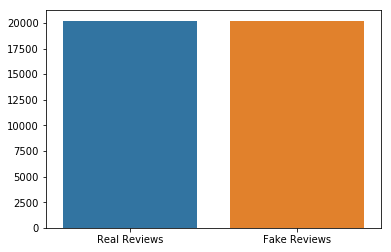

In [5]:
sns.barplot(
            x = ['Real Reviews','Fake Reviews']
            ,y = [20216,20216]
            )

### Spliting Dataset into Train-Test Set.

<blockquote> For this purpose, the dataset is then splitted into two separate datasets named
   <br> <b> Training Set having X_train and y_train  </b> <br ><b>Testing Set having X_test and y_test </b> </blockquote>
   
   <blockquote> Note: Only 20% Dataset is used for Testing purposes hence test_size=0.20 </blockquote>

In [6]:
from sklearn.model_selection import train_test_split
X = dataset_one['text_']
y = dataset_one['label']
X_train, X_test , y_train , y_test = train_test_split(X,y, test_size = 0.20, random_state = 42)


## Training First Classifier - Logistic Regression

<blockquote> For our first classifier we chose Logistic Regression 
    <br> But before that, it is a good practice to create a <b> Pipeline </b> object for ourselves it can significantly reduce the lines of code written for <b> Feature Extraction and Model-Fitting </b> <br>The motivation behind a pipeline is to permit you to expand the iteration cycle with the additional certainty that writing the code the interaction gives and to scale the number of models you can maintain <br> <br> <b> Feature Extraction: </b> It is the process of extracting meaningful data from the dataset that can be used to train the model for future predictions <br> <br> <b>Why TF-IDF </b> [ Term Frequency - Inverse Document Frequency]? <br> a statistical measure that evaluates how relevant a word is to a document in a collection of documents. This is done by multiplying two metrics: <b> how many times a word appears </b> in a document, and the inverse document frequency of the word across a set of documents. <br> <br> <b> TF-IDF Parameters </b> <br> N-Grams can be described as a sequence of N-Words or sequence of words in a document that the feature extraction method considers. We used <b> Unigrams (1) and Bigrams (2)</b> as it improves the model's accuracy. Furthermore, considering our dataset, limiting maximum features to 25,000 has improved the model's performance.
</blockquote>


<blockquote> <b> Classification Report </b> is a report of overall performance of the trained model <br> <ul>
    <li> <b>Precision :</b> <i> The quality of a positive prediction made by the model</i> </li>
    <li> <b>Recall :</b> <i>How many of the true positives were recalled</i></li>
    <li><b>F1-Score :</b> <i>F1 Score is the weighted average of Precision and Recall.</i></li>
</ul>
</blockquote>


<blockquote> <b> Confusion Matrix </b> is a matrix for evaluating how many correct and wrong predictions the model has made
</blockquote>


In [7]:
%%time
classifierOne = Pipeline([('tfidf',TfidfVectorizer(ngram_range=(1,2),max_features=25000)),('clf',LogisticRegression(solver='lbfgs',max_iter=500))])
classifierOne.fit(X_train,y_train)
predictionsLR = classifierOne.predict(X_test)
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_test,predictionsLR))

              precision    recall  f1-score   support

        FAKE       0.94      0.92      0.93      4016
        REAL       0.92      0.94      0.93      4071

    accuracy                           0.93      8087
   macro avg       0.93      0.93      0.93      8087
weighted avg       0.93      0.93      0.93      8087

CPU times: user 11.4 s, sys: 514 ms, total: 11.9 s
Wall time: 13.9 s


### Saving the trained model on the disk for later use.

<blockquote> <b> Pickle Library </b> helps saving a trained model on the disk  </blockquote>

In [8]:
filename = 'finalized_modelLogisticRegression.sav'
pickle.dump(classifierOne, open(filename, 'wb'))

(array([0.5, 1.5]), <a list of 2 Text yticklabel objects>)

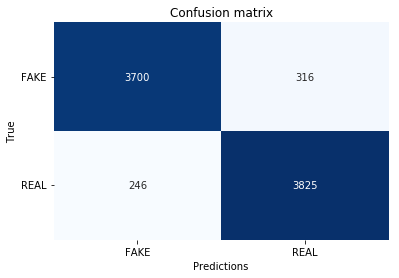

In [9]:


classes = np.unique(y_test)
y_test_array = pd.get_dummies(y_test, drop_first=False).values


cm = metrics.confusion_matrix(y_test, predictionsLR)
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
            cbar=False)
ax.set(xlabel="Predictions", ylabel="True", xticklabels=classes, 
       yticklabels=classes, title="Confusion matrix")
plt.yticks(rotation=0)


In [10]:
metrics.accuracy_score(y_test,predictionsLR)

0.9305057499690862

## Logistic Regression Accuracy  93%

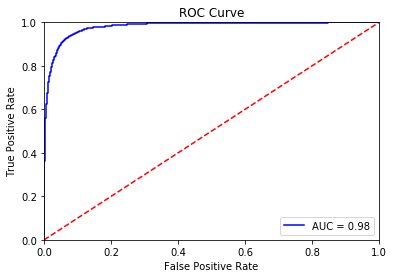

In [11]:
predicted_prob = classifierOne.predict_proba(X_test)

for i in range(len(classes)):
    fpr, tpr, thresholds = metrics.roc_curve(y_test_array[:,i],  
                           predicted_prob[:,i])
  
roc_auc = metrics.auc(fpr, tpr)

plt.title('ROC Curve')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Training Second Classifier - Naive Bayes

<blockquote> probabilistic classifier based on applying Bayes' theorem with strong (naive) independence assumptions between the features <br>
  P (A|B)  = P (B|A) . P(A) / P(B) 
  <br>
    
</blockquote>



In [12]:
%%time
from sklearn.naive_bayes import MultinomialNB
classifierThree = Pipeline([('tfidf',TfidfVectorizer(ngram_range=(1,2),max_features=25000)),('clf',MultinomialNB())])
classifierThree.fit(X_train,y_train)
NBPred = classifierThree.predict(X_test)
print(classification_report(y_test,NBPred))


              precision    recall  f1-score   support

        FAKE       0.89      0.92      0.91      4016
        REAL       0.92      0.89      0.90      4071

    accuracy                           0.91      8087
   macro avg       0.91      0.91      0.91      8087
weighted avg       0.91      0.91      0.91      8087

CPU times: user 6.84 s, sys: 211 ms, total: 7.05 s
Wall time: 6.95 s


In [13]:
filename2 = 'finalized_modelNaiveBayes.sav'
pickle.dump(classifierThree, open(filename2, 'wb'))

In [14]:
metrics.accuracy_score(y_test,NBPred)

0.9051564238901941

(array([0.5, 1.5]), <a list of 2 Text yticklabel objects>)

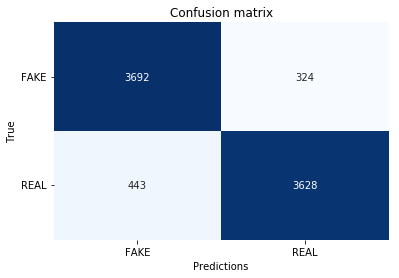

In [15]:
classes = np.unique(y_test)
y_test_array2 = pd.get_dummies(y_test, drop_first=False).values


cm = metrics.confusion_matrix(y_test, NBPred)
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
            cbar=False)
ax.set(xlabel="Predictions", ylabel="True", xticklabels=classes, 
       yticklabels=classes, title="Confusion matrix")
plt.yticks(rotation=0)


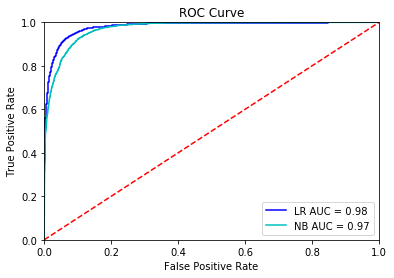

In [16]:
predicted_prob2 = classifierThree.predict_proba(X_test)

for i in range(len(classes)):
    fpr2, tpr2, thresholds2 = metrics.roc_curve(y_test_array2[:,i],  
                           predicted_prob2[:,i])
  
roc_auc2 = metrics.auc(fpr2, tpr2)

plt.title('ROC Curve')
plt.plot(fpr, tpr, 'b', label = 'LR AUC = %0.2f' % roc_auc)
plt.plot(fpr2, tpr2, 'c', label = 'NB AUC = %0.2f' % roc_auc2)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [17]:
%%time
from sklearn.svm import SVC # "Support vector classifier"
classifierfour = Pipeline([('tfidf',TfidfVectorizer(ngram_range=(1,2),max_features= 25000)),('clf',SVC(kernel='linear',probability=True))])
classifierfour.fit(X_train,y_train)

Svmpred = classifierfour.predict(X_test)
print(classification_report(y_test,Svmpred))

              precision    recall  f1-score   support

        FAKE       0.94      0.93      0.94      4016
        REAL       0.94      0.95      0.94      4071

    accuracy                           0.94      8087
   macro avg       0.94      0.94      0.94      8087
weighted avg       0.94      0.94      0.94      8087

CPU times: user 34min 12s, sys: 11.4 s, total: 34min 23s
Wall time: 34min 58s


In [18]:
filename3 = 'finalized_modelSVM2.sav'
pickle.dump(classifierfour, open(filename3, 'wb'))

In [19]:
metrics.accuracy_score(y_test,Svmpred)

0.9400272041548163

(array([0.5, 1.5]), <a list of 2 Text yticklabel objects>)

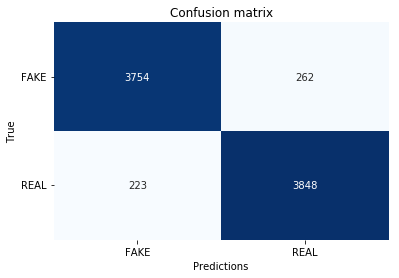

In [20]:
classes = np.unique(y_test)
y_test_array3 = pd.get_dummies(y_test, drop_first=False).values


cm = metrics.confusion_matrix(y_test, Svmpred)
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
            cbar=False)
ax.set(xlabel="Predictions", ylabel="True", xticklabels=classes, 
       yticklabels=classes, title="Confusion matrix")
plt.yticks(rotation=0)


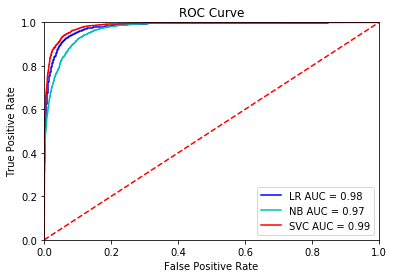

In [21]:
predicted_prob3 = classifierfour.predict_proba(X_test)

for i in range(len(classes)):
    fpr3, tpr3, thresholds3 = metrics.roc_curve(y_test_array3[:,i],  
                           predicted_prob3[:,i])
  
roc_auc3 = metrics.auc(fpr3, tpr3)

plt.title('ROC Curve')
plt.plot(fpr, tpr, 'b', label = 'LR AUC = %0.2f' % roc_auc)
plt.plot(fpr2, tpr2, 'c', label = 'NB AUC = %0.2f' % roc_auc2)
plt.plot(fpr3, tpr3, 'c',color='red', label = 'SVC AUC = %0.2f' % roc_auc3)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [22]:
%%time
from sklearn.tree import DecisionTreeClassifier
classifierfive = Pipeline([('tfidf',TfidfVectorizer(ngram_range=(1,2),max_features= 25000)),('clf',DecisionTreeClassifier())])
classifierfive.fit(X_train,y_train)

Dtpred = classifierfive.predict(X_test)
print(classification_report(y_test,Dtpred))

              precision    recall  f1-score   support

        FAKE       0.77      0.79      0.78      4016
        REAL       0.78      0.77      0.78      4071

    accuracy                           0.78      8087
   macro avg       0.78      0.78      0.78      8087
weighted avg       0.78      0.78      0.78      8087

CPU times: user 44.1 s, sys: 893 ms, total: 45 s
Wall time: 50.1 s


In [23]:
metrics.accuracy_score(y_test,Dtpred)



0.7787807592432299

(array([0.5, 1.5]), <a list of 2 Text yticklabel objects>)

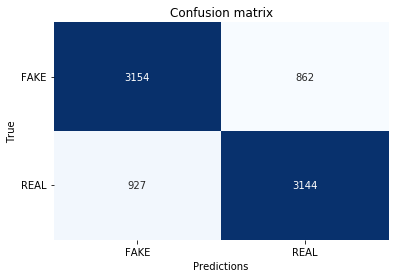

In [24]:
classes = np.unique(y_test)
y_test_array4 = pd.get_dummies(y_test, drop_first=False).values


cm = metrics.confusion_matrix(y_test, Dtpred)
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
            cbar=False)
ax.set(xlabel="Predictions", ylabel="True", xticklabels=classes, 
       yticklabels=classes, title="Confusion matrix")
plt.yticks(rotation=0)


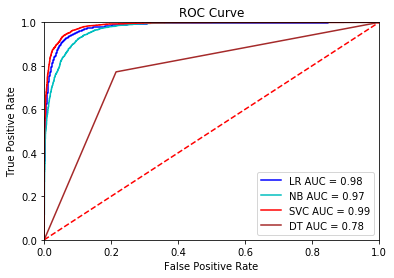

In [25]:
predicted_prob4 = classifierfive.predict_proba(X_test)

for i in range(len(classes)):
    fpr4, tpr4, thresholds4 = metrics.roc_curve(y_test_array4[:,i],  
                           predicted_prob4[:,i])
  
roc_auc4 = metrics.auc(fpr4, tpr4)

plt.title('ROC Curve')
plt.plot(fpr, tpr, 'b', label = 'LR AUC = %0.2f' % roc_auc)
plt.plot(fpr2, tpr2, 'c', label = 'NB AUC = %0.2f' % roc_auc2)
plt.plot(fpr3, tpr3, 'c',color='red', label = 'SVC AUC = %0.2f' % roc_auc3)
plt.plot(fpr4, tpr4, 'c',color='brown', label = 'DT AUC = %0.2f' % roc_auc4)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [26]:
%%time
from sklearn.neighbors import KNeighborsClassifier
classifiersix = Pipeline([('tfidf',TfidfVectorizer(ngram_range=(1,2),max_features= 25000)),('clf',KNeighborsClassifier(n_neighbors=5))])
classifiersix.fit(X_train,y_train)

Knpred = classifiersix.predict(X_test)
print(classification_report(y_test,Knpred))

              precision    recall  f1-score   support

        FAKE       0.60      0.98      0.74      4016
        REAL       0.95      0.35      0.52      4071

    accuracy                           0.67      8087
   macro avg       0.77      0.67      0.63      8087
weighted avg       0.77      0.67      0.63      8087

CPU times: user 26.8 s, sys: 4.78 s, total: 31.6 s
Wall time: 33.5 s


In [27]:
metrics.accuracy_score(y_test,Knpred)

0.665017930011129

(array([0.5, 1.5]), <a list of 2 Text yticklabel objects>)

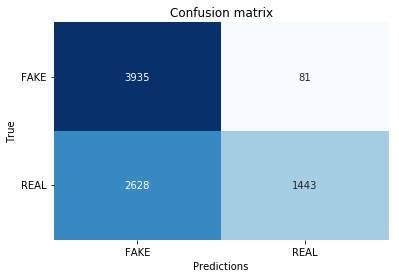

In [28]:
classes = np.unique(y_test)
y_test_array5 = pd.get_dummies(y_test, drop_first=False).values


cm = metrics.confusion_matrix(y_test, Knpred)
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
            cbar=False)
ax.set(xlabel="Predictions", ylabel="True", xticklabels=classes, 
       yticklabels=classes, title="Confusion matrix")
plt.yticks(rotation=0)


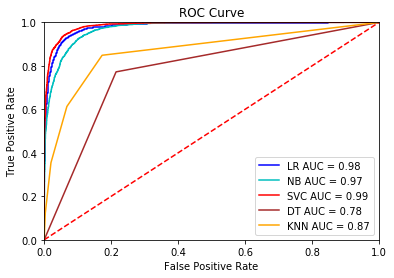

In [29]:
predicted_prob5 = classifiersix.predict_proba(X_test)

for i in range(len(classes)):
    fpr5, tpr5, thresholds5 = metrics.roc_curve(y_test_array5[:,i],  
                           predicted_prob5[:,i])
  
roc_auc5 = metrics.auc(fpr5, tpr5)

plt.title('ROC Curve')
plt.plot(fpr, tpr, 'b', label = 'LR AUC = %0.2f' % roc_auc)
plt.plot(fpr2, tpr2, 'c', label = 'NB AUC = %0.2f' % roc_auc2)
plt.plot(fpr3, tpr3, 'c',color='red', label = 'SVC AUC = %0.2f' % roc_auc3)
plt.plot(fpr4, tpr4, 'c',color='brown', label = 'DT AUC = %0.2f' % roc_auc4)
plt.plot(fpr5, tpr5, 'c',color='orange', label = 'KNN AUC = %0.2f' % roc_auc5)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [30]:




dump(classifierOne, filename="ModelLogisticNew.joblib")

['ModelLogisticNew.joblib']

In [31]:

dump(classifierThree, filename="ModelBayesNew.joblib")

['ModelBayesNew.joblib']

In [32]:

dump(classifierfour, filename="ModelSVMNew.joblib")

['ModelSVMNew.joblib']

In [33]:

dump(classifierfive, filename="ModelDTNew.joblib")

['ModelDTNew.joblib']